# Exploratory Data Analysis - Retail

### Task 3: Perform Exploratory Data Analysis on dataset 'SampleSuperstore'.
### By: Vaibhav Sharma

In [13]:
import pandas as pd
import warnings
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')
superstore = pd.read_csv('SampleSuperstore.csv')
superstore.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [14]:
superstore.shape

(9994, 13)

In [15]:
superstore.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [16]:
superstore.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [17]:
superstore.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [18]:
superstore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [19]:
superstore.duplicated().sum()

17

In [20]:
superstore.shape

(9994, 13)

In [21]:
superstore = superstore.drop(['Postal Code'],axis=1)

In [22]:
superstore.describe()

,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,0.156203,28.656896
std,623.245101,2.225110,0.206452,234.260108
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.728750
50%,54.490000,3.000000,0.200000,8.666500
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


In [23]:
corr_mat = superstore.corr()
corr_mat

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200795,-0.028190,0.479064
Quantity,0.200795,1.000000,0.008623,0.066253
Discount,-0.028190,0.008623,1.000000,-0.219487
Profit,0.479064,0.066253,-0.219487,1.000000


<AxesSubplot:>

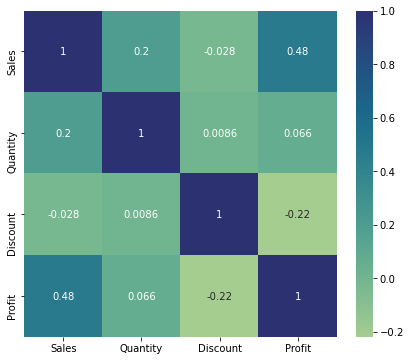

In [24]:
plt.rcParams['figure.figsize'] = (15,6)
plt.figure(figsize=(7,6))
sns.heatmap(corr_mat, cmap='crest', annot=True)

### Category visualization

In [25]:
superstore['Category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [26]:
Store_2 = superstore.groupby(['Category'])[['Sales','Discount','Profit']].mean()
Store_2

,Sales,Discount,Profit
Category,,,
Furniture,349.834887,0.173923,8.699327
Office Supplies,119.324101,0.157285,20.327050
Technology,452.709276,0.132323,78.752002


array([<AxesSubplot:ylabel='Sales'>, <AxesSubplot:ylabel='Discount'>,
       <AxesSubplot:ylabel='Profit'>], dtype=object)

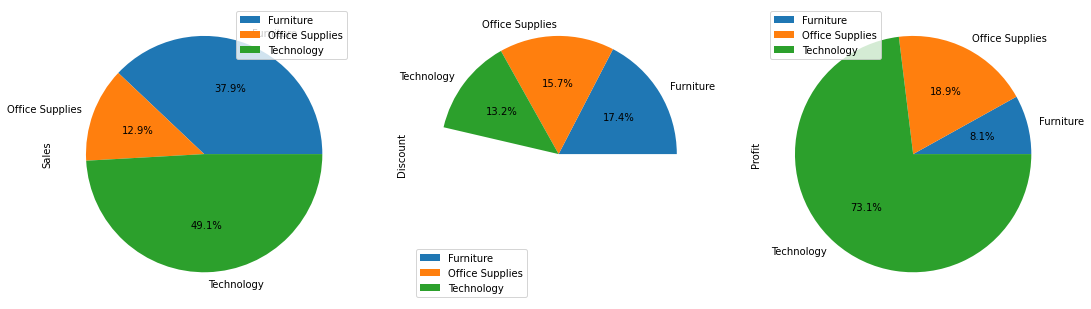

In [27]:
Store_2.plot(kind='pie',subplots=True,figsize=(18,20),autopct='%1.1f%%',labels=Store_2.index)

**This pie charts represents that superstore deals in Office supplies more than Furniture and Technology.**

**Maximum discout is offered on furniture.**

**Product category Technology is significantly more profitable than other product sub categories.** 

### Shipment mode Visualization

In [28]:
superstore['Ship Mode'].value_counts()

Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: Ship Mode, dtype: int64

array([<AxesSubplot:ylabel='Sales'>, <AxesSubplot:ylabel='Discount'>,
       <AxesSubplot:ylabel='Profit'>], dtype=object)

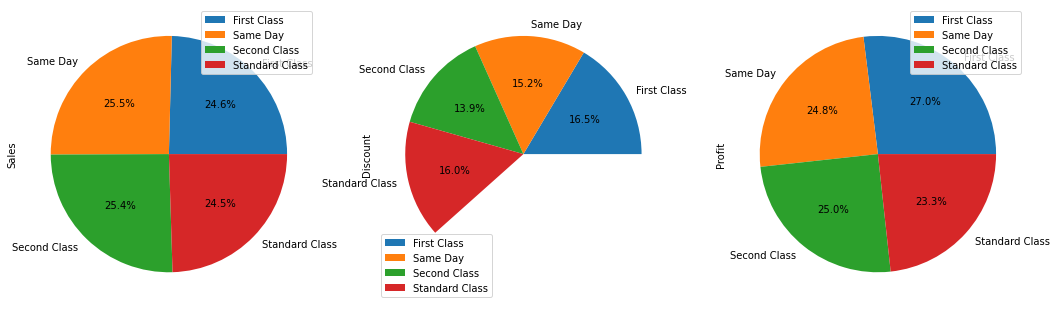

In [29]:
Store= superstore.groupby(['Ship Mode'])[['Sales','Discount','Profit']].mean()
Store.plot.pie(subplots=True,figsize=(18,20),autopct='%1.1f%%', labels=Store.index)

**All the shipment modes are almost considered equally.**

**Maximum discounts are offered on standrad class and first class shipment.**  

**Profit margin on all the shipment methods are almost equal.**


<AxesSubplot:xlabel='Ship Mode', ylabel='count'>

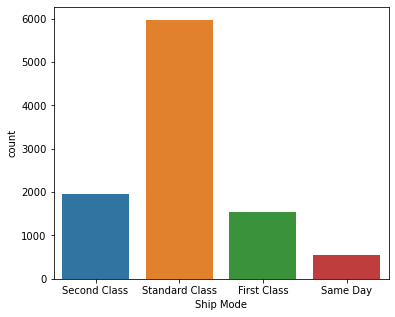

In [30]:
plt.figure(figsize=(6,5))
sns.countplot('Ship Mode',data=superstore)

### Segment Visualization

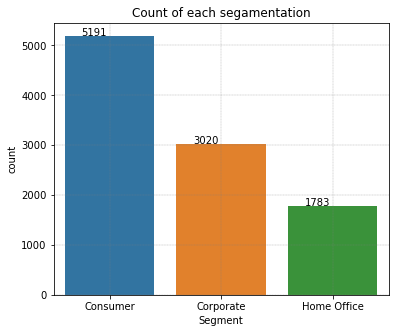

In [31]:
fig = plt.figure(figsize=(6,5))
axes = fig.add_subplot(111)
s = sns.countplot('Segment', data = superstore)
for s in axes.patches:
    axes.annotate('{:.0f}'.format(s.get_height()), (s.get_x()+0.15, s.get_height()+1))
plt.title("Count of each segamentation")
plt.grid(color='gray', linestyle='--', linewidth=0.3)
plt.show()

**The Consumer segment are more preferable.**

**Most customers are opting for standard class shipment method.**


### Products Sub category visualization

In [32]:
superstore['Sub-Category'].unique()

array(['Bookcases', 'Chairs', 'Labels', 'Tables', 'Storage',
       'Furnishings', 'Art', 'Phones', 'Binders', 'Appliances', 'Paper',
       'Accessories', 'Envelopes', 'Fasteners', 'Supplies', 'Machines',
       'Copiers'], dtype=object)

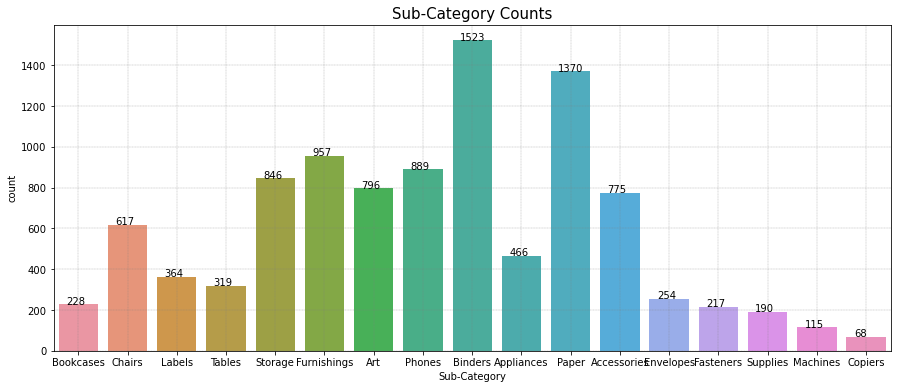

In [33]:
fig = plt.figure(figsize=(15,6))
axes = fig.add_subplot(111)
s = sns.countplot('Sub-Category', data = superstore)
for s in axes.patches:
    axes.annotate('{:.0f}'.format(s.get_height()), (s.get_x()+0.15, s.get_height()+1))
plt.grid(color='gray', linestyle='--', linewidth=0.3)
plt.title("Sub-Category Counts", fontsize=15)
plt.show()

Text(0.5, 1.0, 'Superstore sub category products')

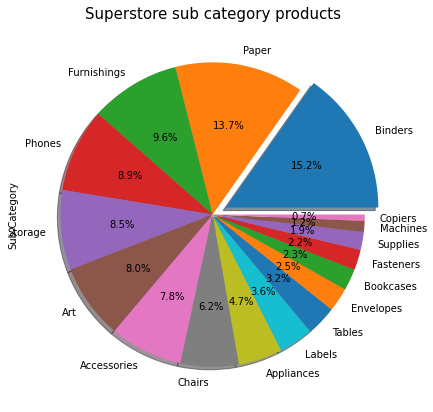

In [34]:
plt.figure(figsize=(15,7))
sub_cat = superstore['Sub-Category'].value_counts()
theme = plt.get_cmap('hsv')
sub_cat.plot.pie(autopct="%1.1f%%", shadow=True, explode=(0.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0))
plt.title('Superstore sub category products', fontsize=15)

**Bargraph and pie chart represent that store deals in a wide variety of office supplies especially in Binders and Paper.**

### Sub Categories Distributed w.r.t Category

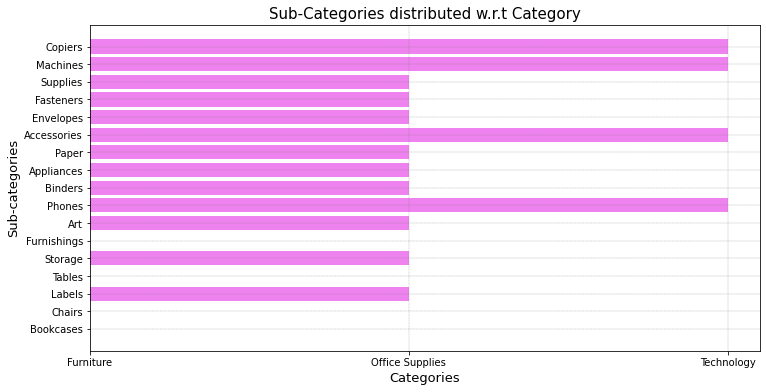

In [35]:
plt.figure(figsize=(12,6))
plt.barh('Sub-Category','Category', data=superstore, color='violet')
plt.xlabel("Categories",fontsize=13)
plt.ylabel("Sub-categories", fontsize=13)
plt.title("Sub-Categories distributed w.r.t Category",fontsize=15)
plt.grid(color='gray', linestyle='--', linewidth=0.3)

**From this graph, we can easily makeout which Category & Sub-Category to choose when they are looking to purchase a product.**

### Sales Visualization

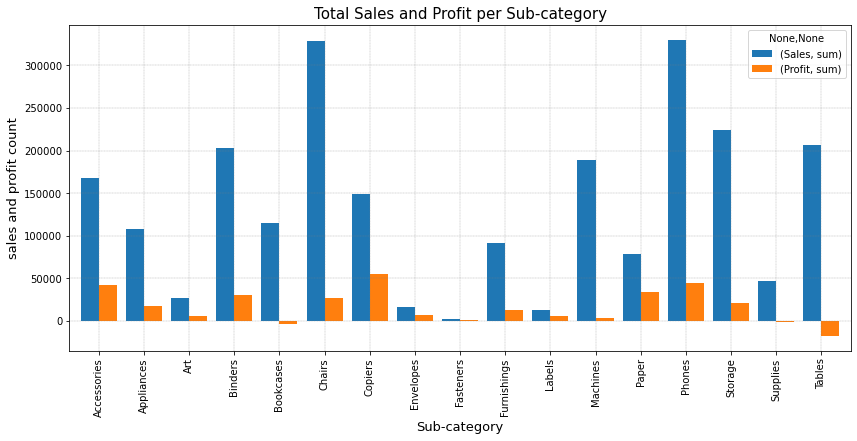

In [36]:
sale_profit_sum = superstore.groupby('Sub-Category')['Sales','Profit'].agg(['sum'])
sale_profit_sum.plot.bar(width=0.8,figsize=(14,6))
plt.title("Total Sales and Profit per Sub-category", fontsize=15)
plt.xlabel("Sub-category", fontsize=13)
plt.ylabel("sales and profit count",fontsize=13)
plt.grid(color='gray', linestyle='--', linewidth=0.3)

 **Highest profit is earned in Copiers while Selling price for Chairs and Phones is extremely high compared to other products.**

**People dont prefer to buy Tables and Bookcases from Superstore. Hence these departments are in loss.**

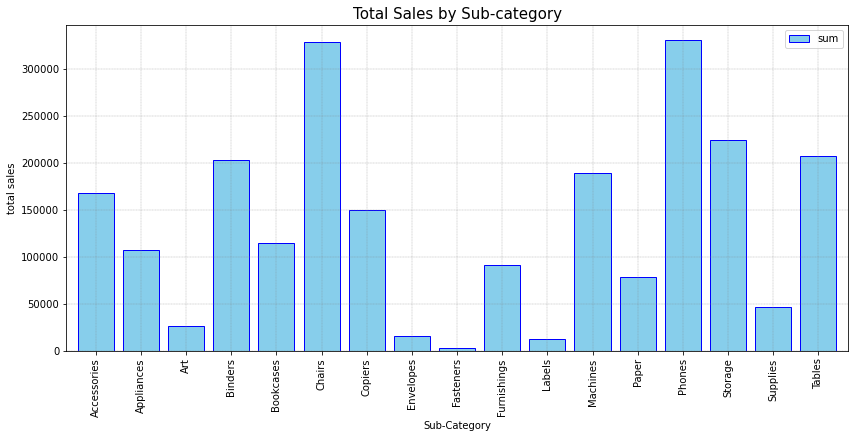

In [37]:
sub_cat_sales = superstore.groupby('Sub-Category')['Sales'].agg(['sum'])
sub_cat_sales.plot.bar(width=0.8,figsize=(14,6), color='skyblue', edgecolor='blue')
plt.title('Total Sales by Sub-category',fontsize = 15)
plt.ylabel('total sales')
plt.grid(color='gray', linestyle='--', linewidth=0.3)
plt.show()

**The graph represents the highest total sale in Phones and chair, means most of the people buy phones and chair from this store**

### Cost Visualization

        Ship Mode    Segment        Country             City       State  \
0    Second Class   Consumer  United States        Henderson    Kentucky   
1    Second Class   Consumer  United States        Henderson    Kentucky   
2    Second Class  Corporate  United States      Los Angeles  California   
3  Standard Class   Consumer  United States  Fort Lauderdale     Florida   
4  Standard Class   Consumer  United States  Fort Lauderdale     Florida   

  Region         Category Sub-Category     Sales  Quantity  Discount  \
0  South        Furniture    Bookcases  261.9600         2      0.00   
1  South        Furniture       Chairs  731.9400         3      0.00   
2   West  Office Supplies       Labels   14.6200         2      0.00   
3  South        Furniture       Tables  957.5775         5      0.45   
4  South  Office Supplies      Storage   22.3680         2      0.20   

     Profit       Cost  
0   41.9136   220.0464  
1  219.5820   512.3580  
2    6.8714     7.7486  
3 -383.031

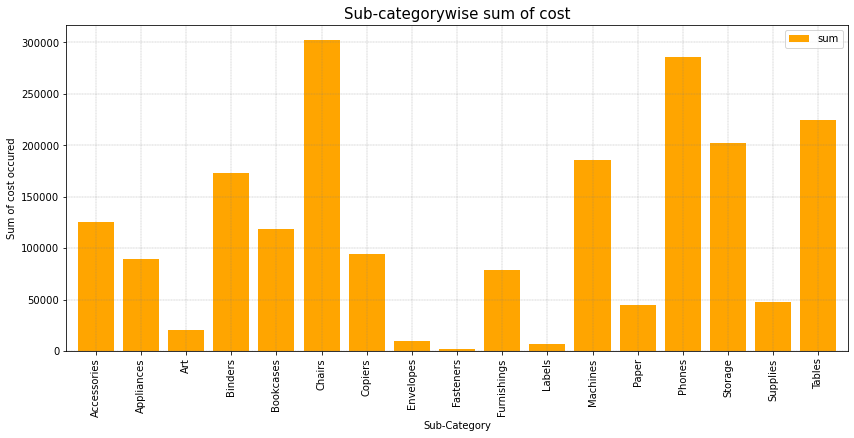

In [38]:
# adding new column 'Cost' in the existing dataset
superstore['Cost'] = superstore['Sales'] - superstore['Profit']
print(superstore.head())

cost_occured = superstore.groupby('Sub-Category')['Cost'].agg(['sum'])
cost_occured.plot.bar(width=0.8,figsize=(14,6), color='orange')
plt.title('Sub-categorywise sum of cost',fontsize = 15)
plt.ylabel("Sum of cost occured")
plt.grid(color='gray', linestyle='--', linewidth=0.3)
plt.show()

**Retailers spending more cost on chairs, phones and Tables**

In [39]:
superstore['Profit %']=(superstore['Profit']/superstore['Cost'])*100
superstore.iloc[[0,1,2,3,4],[8,13]]

,Sales,Profit %
0,261.9600,19.047619
1,731.9400,42.857143
2,14.6200,88.679245
3,957.5775,-28.571429
4,22.3680,12.676056


In [40]:
superstore.sort_values(['Profit %','Sub-Category'],ascending=False).groupby('Profit %').head(10)

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Cost,Profit %
1696,Second Class,Home Office,United States,Bayonne,New Jersey,East,Technology,Phones,104.980,2,0.0,52.4900,52.4900,100.000000
2592,Second Class,Corporate,United States,Summerville,South Carolina,South,Technology,Phones,79.100,2,0.0,39.5500,39.5500,100.000000
6338,Standard Class,Corporate,United States,New York City,New York,East,Technology,Phones,87.800,4,0.0,43.9000,43.9000,100.000000
246,Second Class,Home Office,United States,Lakeville,Minnesota,Central,Office Supplies,Paper,47.880,6,0.0,23.9400,23.9400,100.000000
381,First Class,Corporate,United States,San Francisco,California,West,Office Supplies,Paper,50.960,7,0.0,25.4800,25.4800,100.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8916,Standard Class,Corporate,United States,Austin,Texas,Central,Office Supplies,Appliances,48.784,4,0.8,-131.7168,180.5008,-72.972973
8766,Standard Class,Corporate,United States,Fort Worth,Texas,Central,Office Supplies,Appliances,24.588,3,0.8,-67.6170,92.2050,-73.333333
9164,Standard Class,Consumer,United States,Chicago,Illinois,Central,Office Supplies,Appliances,143.128,2,0.8,-393.6020,536.7300,-73.333333
261,Standard Class,Corporate,United States,Pasadena,Texas,Central,Office Supplies,Appliances,1.624,2,0.8,-4.4660,6.0900,-73.333333


**Retailers selling Phone,Binders,Papers have got 100% Profit in their Business**

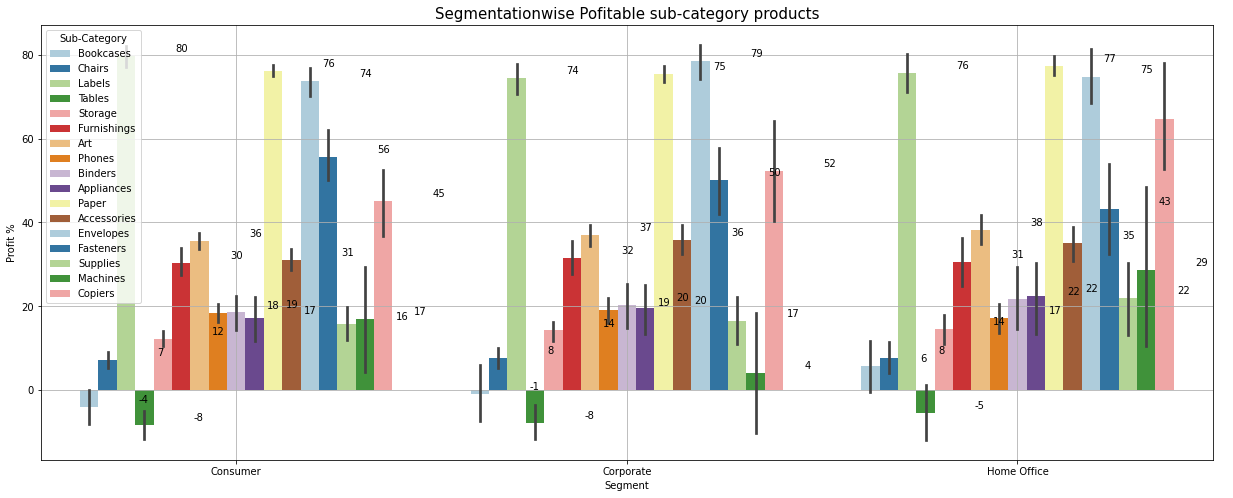

In [41]:
fig=plt.figure(figsize=(21,8))
ax = fig.add_subplot(111)
sns.barplot('Segment','Profit %',hue='Sub-Category',palette='Paired',data=superstore)
for o in ax.patches:
    ax.annotate('{:.0f}'.format(o.get_height()), (o.get_x()+0.15, o.get_height()+1))
plt.title("Segmentationwise Pofitable sub-category products", fontsize=15)
plt.grid()
plt.show()

**The above graph represents, Superstore makes more profit from Paper, Bookcase and supplies sub-categories in each segment.
But superstore encounters losses on machies on each category and on envelopes in consumer and corporate segment.**

### Regionwise visualization

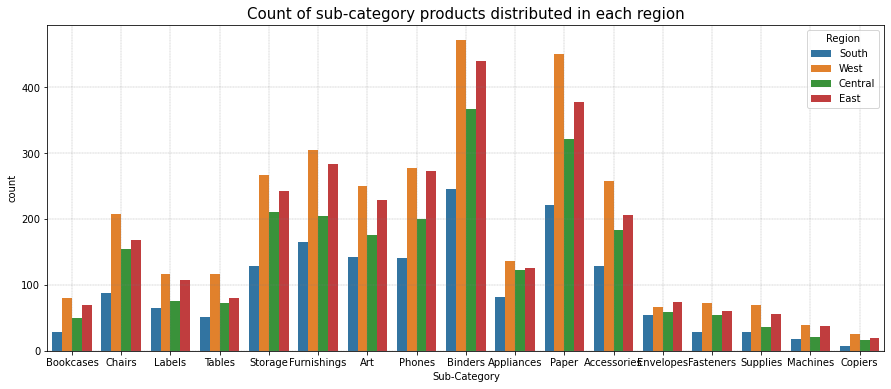

In [42]:
sns.countplot( data=superstore, x='Sub-Category', hue='Region')
plt.title("Count of sub-category products distributed in each region", fontsize=15)
plt.grid(color='gray', linestyle='--', linewidth=0.3)

**People residing in Western and eastern part of US tend to order more from superstore than people residing in southern and central part.**

<AxesSubplot:title={'center':'Region Wise Profit'}, xlabel='Region', ylabel='Profit'>

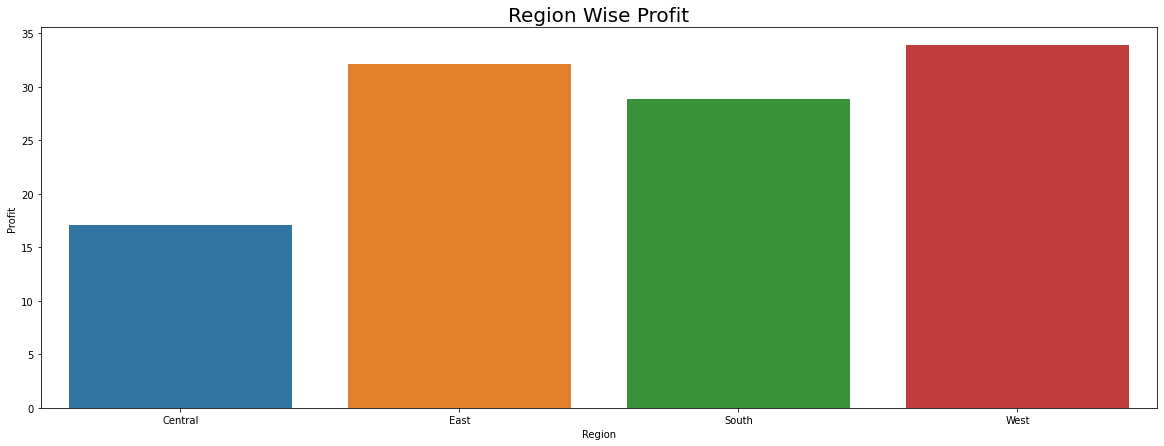

In [43]:
region_p = superstore[['Profit','Region']].groupby(by='Region').mean()
plt.figure(figsize=(20,7))
plt.title('Region Wise Profit',fontsize=20)
sns.barplot(x=region_p.index,y=region_p.Profit,data=region_p)


**Most of the profit gained is by oders from western part of country**

In [44]:
Store_s=superstore.groupby(['State'])[['Sales','Discount','Profit']].mean()
Store_s.head(10)

,Sales,Discount,Profit
State,,,
Alabama,319.846557,0.000000,94.865989
Arizona,157.508933,0.303571,-15.303235
Arkansas,194.635500,0.000000,66.811452
California,228.729451,0.072764,38.171608
Colorado,176.418231,0.316484,-35.867351
Connecticut,163.223866,0.007317,42.823071
Delaware,285.948635,0.006250,103.930988
District of Columbia,286.502000,0.000000,105.958930
Florida,233.612815,0.299347,-8.875461


In [45]:
Store_1 = Store_s.sort_values('Profit')

<Figure size 1800x1440 with 0 Axes>

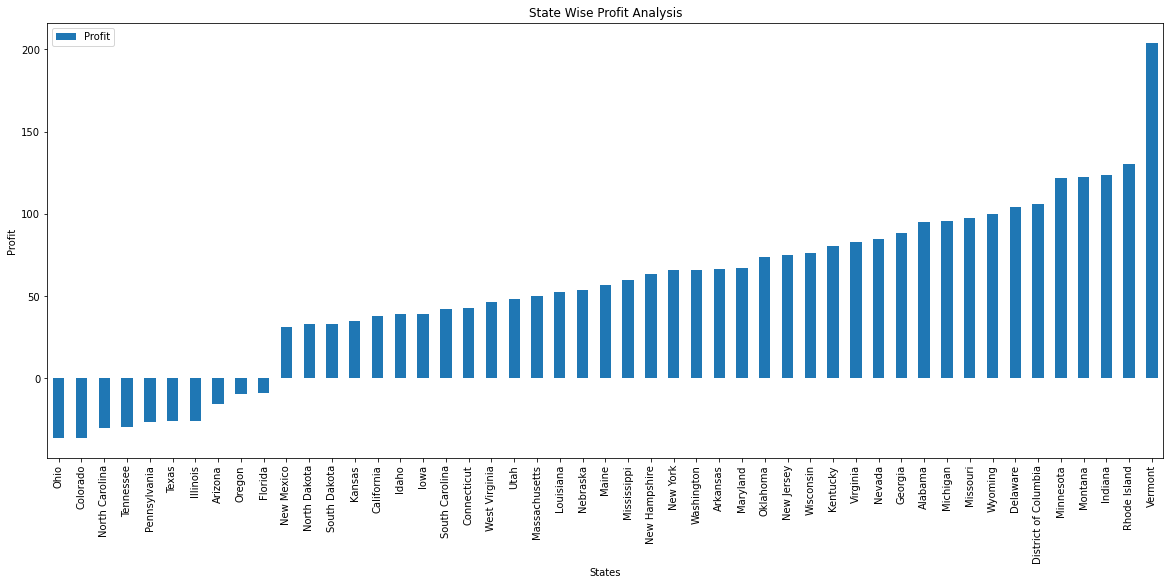

<Figure size 1800x1440 with 0 Axes>

In [46]:
Store_1[['Profit']].plot(kind='bar',figsize=(20,8))
plt.title('State Wise Profit Analysis')
plt.ylabel('Profit')
plt.xlabel('States')
plt.figure(figsize=(25,20))

**Most profitable state for superstore to operate is Vermont**
**And operations of store in Ohio are causing maximum losses.**

Text(0.5, 1.0, 'State Wise Analysis of Sale')

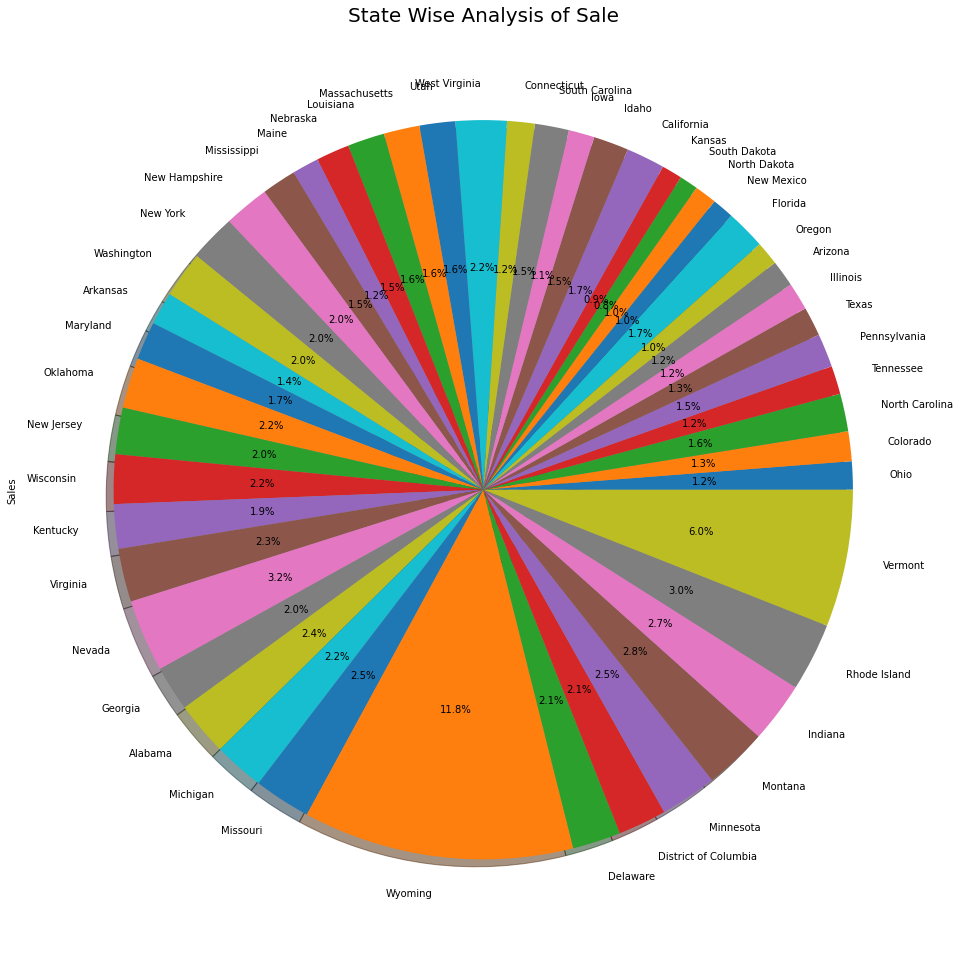

In [47]:
Store_1['Sales'].plot(kind='pie',figsize=(17,17),autopct='%1.1f%%',startangle=0,shadow=True)
plt.title('State Wise Analysis of Sale',fontsize=20)

**Wyoming is the state having maximum sales.**



### Findings

**1.Total customers=9994**

**2.Customers of the store are divided in 3 categories Consumer, Corporate, Home Office.**

**3.Products in the store are divided into 3 categories Technology, Office Supplies and Furniture.**

**4.There are 17 sub categories of the product category.**

**5.Store offers 4 shipment methods first class, second class, standard class, same day.**

**6.Store deals in 49 States of United states with most profit being gained by western part of the country.**

**7.Highest profit is earned in Copiers and most sales are in phones and chair.**

**8.Maximum discount being offered on furniture.**

**9.Standard class is most preferred shipment method.**

**10.Maximum profit from Vermont and maximum sales in Wyoming.**

**11.Retailers selling Phone,Binders,Papers have got 100% Profit in their Business.**

**12.Customers don't prefer to buy Tables and Bookcases from store. Hence these departments are in loss.**

**13.Store encounters losses on machines on each category of customers and on envelopes in consumer and corporate segment.**

**14.Operations in Ohio, Colorado, North Carolina are causing maximum losses.**

**15.Sales are comparatively low in central part of the country than in other parts.**

